# Webscraping

## Intro


- source: [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

- useful resources: [Introduction do HTML](https://www.w3schools.com/html/html_intro.asp)

In [1]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [5]:
soup.title

<title>The Dormouse's story</title>

In [6]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [7]:
soup.p['class']

['title']

In [8]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [9]:
soup.findAll('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [10]:
soup.find(id = 'link2')

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>

In [11]:
for link in soup.findAll('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [12]:
for element in soup.findAll('p'):
    print(element.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [13]:
soup.findAll('title')

[<title>The Dormouse's story</title>]

In [14]:
tag = soup.p; print(type(tag))

<class 'bs4.element.Tag'>


In [15]:
tag.name

'p'

In [16]:
tag['id'] = "noweid"; print (tag)

<p class="title" id="noweid"><b>The Dormouse's story</b></p>


In [17]:
del tag['id']; tag

<p class="title"><b>The Dormouse's story</b></p>

In [18]:
tag.attrs

{'class': ['title']}

In [19]:
tag.text

"The Dormouse's story"

In [20]:
tag.string

"The Dormouse's story"

In [21]:
type(tag.text)

str

In [22]:
type(tag.string)

bs4.element.NavigableString

### Going deep, going back and forth

In [23]:
soup.head

<head><title>The Dormouse's story</title></head>

In [24]:
soup.title

<title>The Dormouse's story</title>

In [25]:
soup.body

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>

In [26]:
soup.b

<b>The Dormouse's story</b>

In [27]:
soup.body.contents

['\n',
 <p class="title"><b>The Dormouse's story</b></p>,
 '\n',
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 '\n',
 <p class="story">...</p>,
 '\n']

In [28]:
soup.body.contents[1]

<p class="title"><b>The Dormouse's story</b></p>

In [29]:
soup.head.contents

[<title>The Dormouse's story</title>]

In [30]:
for child in soup.head.descendants:
    print("!")
    print(child)

!
<title>The Dormouse's story</title>
!
The Dormouse's story


In [31]:
len(list(soup.children))

2

In [32]:
len(list(soup.descendants))

27

In [33]:
# .parents

In [34]:
sibling_soup = BeautifulSoup("<a><b>text1</b><c>text2</c></a>")
print(sibling_soup.prettify())

<a>
 <b>
  text1
 </b>
 <c>
  text2
 </c>
</a>


In [35]:
sibling_soup.b.next_sibling

<c>text2</c>

In [36]:
sibling_soup.b.previous_sibling

### Searching the tree

In [37]:
print( soup.prettify() )

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [38]:
soup.find_all('b')

[<b>The Dormouse's story</b>]

In [39]:
soup.find_all(["a", "b"])

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [40]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a
a
p


In [41]:
soup.find_all("a", class_ = "sister")
# soup.find_all("a", attrs={"class": "sister"})

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [42]:
soup.find_all(string="Elsie")

['Elsie']

In [43]:
soup.select("body a")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [44]:
# Find tags by CSS class
soup.select(".sister")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [45]:
# Find tags by ID
soup.select("#link1")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

In [46]:
soup.select("#link1,#link2")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

## Przykład 1


useful resources:

- [html status codes](https://www.restapitutorial.com/httpstatuscodes.html)
- [Beginner’s Guide to Chrome Dev Tools](https://blog.uilicious.com/beginners-guide-to-chrome-dev-tools-network-pane-cfba8f0e3840)
- [strona GPW](https://www.gpw.pl/pl-home)

In [47]:
import re
import requests # for performing HTTP requests
import json
from bs4 import BeautifulSoup # for handling all of HTML processing


In [48]:
url = 'https://www.gpw.pl/pl-home'
res = requests.get(url); print(res.status_code)

200


In [49]:
res.content

b'\t\r\n\n<!DOCTYPE html>\n<html lang="pl">\n    <head>\n        <!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-K8CWHCH\');</script>\n<!-- End Google Tag Manager -->\n\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="description" content="Rynek G\xc5\x82\xc3\xb3wny" />\n<meta name="robots" content="index, follow" />\n<meta name="revisit-after" content="5 days" /><meta name="author" content="SUPERMEDIA Interactive" />\n<meta http-equiv="Content-Language" content="pl"/>\n<META NAME="Content-Type" CONTENT="text/html; charset=pl">\n<title>G\xc5\x82\xc3\xb3wny Rynek GPW - Rynek G\xc5\x82\xc3\xb3wny</title>\n<link rel="

In [50]:
soup = BeautifulSoup(res.content, 'html.parser')

In [51]:
soup.title

<title>Główny Rynek GPW - Rynek Główny</title>

In [52]:
table = soup.findAll("table", {"class" : "table table-padding-5"})[0]; table

<table class="table table-padding-5">
<tr>
<td><a href="/spolka?isin=PLGETBK00012">GETINOBLE</a></td>
<td>
<div class="pull-right" id="ph_rynek_naj_rosnace_chart1_PLGETBK00012" style="height:20px; width:40px"></div>
<script type="text/javascript">
	    		$(document).ready( function() {
					chartMicro('ph_rynek_naj_rosnace_chart1_PLGETBK00012', {
						isin: 'PLGETBK00012',
						modes: [{mode: 'CURR', from: '450655', to: null}]
					});
				});
        	</script>
</td>
<td class="text-right">0,2320</td>
<td class="text-right text-nowrap"><span class="PaL"><span class="profit margin-left-0">26,09% <i class="icon-up"></i></span></span></td>
</tr>
<tr>
<td><a href="/spolka?isin=PLKAREN00014">CCENERGY</a></td>
<td>
<div class="pull-right" id="ph_rynek_naj_rosnace_chart2_PLKAREN00014" style="height:20px; width:40px"></div>
<script type="text/javascript">
	    		$(document).ready( function() {
					chartMicro('ph_rynek_naj_rosnace_chart2_PLKAREN00014', {
						isin: 'PLKAREN00014',
						mo

In [53]:
table.find_all("a", href=True) 
# eg goto https://www.gpw.pl//spolka?isin=PLTAURN00011

[<a href="/spolka?isin=PLGETBK00012">GETINOBLE</a>,
 <a href="/spolka?isin=PLKAREN00014">CCENERGY</a>,
 <a href="/spolka?isin=PLKRKCH00019">KRAKCHEM</a>,
 <a href="/spolka?isin=EE3100143033">IFSA</a>,
 <a href="/spolka?isin=PLGSPR000014">GETIN</a>,
 <a href="/spolka?isin=PLTRNSU00013">ALTA</a>,
 <a href="/spolka?isin=PLPRGNK00017">PRAGMAINK</a>,
 <a href="/spolka?isin=PLCTINT00018">CIGAMES</a>,
 <a href="/spolka?isin=PLBH00000012">HANDLOWY</a>,
 <a href="/spolka?isin=PLKRINK00014">KREDYTIN</a>,
 <a href="/spolka?isin=PLCPTLP00015">CAPITAL</a>,
 <a href="/spolka?isin=PLODRTS00017">OTLOG</a>,
 <a href="/spolka?isin=PLLKMDW00049">LOKUM</a>,
 <a href="/spolka?isin=PLPZBDT00013">POZBUD</a>]

In [54]:
table.findAll("td", {"class" : "text-right"})[0].get_text()

'0,2320'

In [55]:
gpw_ros = []

for i in table:
    if i.find("a") != -1:
        name = i.find('a').get_text()
        val  = i.find("td", {"class" : "text-right"}).get_text()
        prc  = i.find("td", {"class" : "text-right text-nowrap"}).get_text()
        
        gpw_ros.append([name, val, prc])

gpw_ros

[['GETINOBLE', '0,2320', '26,09% '],
 ['CCENERGY', '1,7000', '25,93% '],
 ['KRAKCHEM', '0,7700', '14,93% '],
 ['IFSA', '1,3300', '10,83% '],
 ['GETIN', '1,0860', '8,71% '],
 ['ALTA', '2,3500', '7,80% '],
 ['PRAGMAINK', '5,6500', '7,62% '],
 ['CIGAMES', '1,6000', '7,53% '],
 ['HANDLOWY', '45,9000', '7,24% '],
 ['KREDYTIN', '11,9000', '7,21% '],
 ['CAPITAL', '1,7900', '7,19% '],
 ['OTLOG', '8,8000', '7,06% '],
 ['LOKUM', '24,4000', '7,02% '],
 ['POZBUD', '3,3600', '6,67% ']]

## Przykład 2

[Working With JSON Data in Python](https://realpython.com/python-json/)

In [56]:
# a Python object (dict):
x = { "uczestnicy": [ 
        { "name": "Anna",
          "age": 22,
          "city": "Warszawa"},  
        { "name": "Zosia",
          "age": 12,
          "city": "Kraków"}]
}

# convert into JSON:
y = json.dumps(x)

# the result is a JSON string:
print(y)

{"uczestnicy": [{"name": "Anna", "age": 22, "city": "Warszawa"}, {"name": "Zosia", "age": 12, "city": "Krak\u00f3w"}]}


In [57]:
type(x)

dict

In [58]:
type(y)

str

**GitHub API i grafika wektorowa**

Źródło: https://github.com/ehmatthes/pcc

In [61]:
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import SVG, HTML

In [62]:
# Make an API call, and store the response.
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

Status code: 200


In [95]:
# Store API response in a variable.
response_dict = r.json()
print("Total repositories:", response_dict['total_count'])
# r.content

Total repositories: 7323897


In [64]:
repo_dicts = response_dict['items']
names, plot_dicts = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])

    # Get the project description, if one is available.
    description = repo_dict['description']
    if not description:
        description = "No description provided."

    plot_dict = {
        'value': repo_dict['stargazers_count'],
        'label': description,
        'xlink': repo_dict['html_url'],
        }
    plot_dicts.append(plot_dict)

In [65]:
names

['system-design-primer',
 'public-apis',
 'Python',
 'Python-100-Days',
 'awesome-python',
 'youtube-dl',
 'models',
 'thefuck',
 'django',
 'flask',
 'keras',
 'httpie',
 'awesome-machine-learning',
 'ansible',
 'transformers',
 'scikit-learn',
 'requests',
 'core',
 'HelloGitHub',
 'scrapy',
 'big-list-of-naughty-strings',
 'you-get',
 'face_recognition',
 'superset',
 'cpython',
 'faceswap',
 'manim',
 'shadowsocks',
 'fastapi',
 'interview_internal_reference']

In [66]:
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [67]:
# Make visualization.
my_style = LS('#333366', base_style=LCS)
my_style.title_font_size = 24
my_style.label_font_size = 14
my_style.major_label_font_size = 18

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', plot_dicts)

display(HTML(base_html.format(rendered_chart=chart.render(is_unicode=True))))

# ML 

- source: [SMOTE with Imbalance Data](https://www.kaggle.com/qianchao/smote-with-imbalance-data/notebook)
- [zbiór danych](https://kaggle.com/mlg-ulb/creditcardfraud)

In [68]:
#https://www.kaggle.com/qianchao/smote-with-imbalance-data/notebook

In [69]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [71]:
data = pd.read_csv('../data/data_asm/creditcard.csv')
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


0    0.998273
1    0.001727
Name: Class, dtype: float64

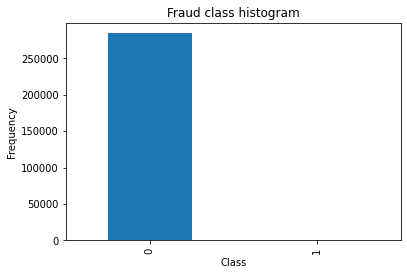

In [72]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts(normalize=True)

In [73]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data[['Amount']])
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [74]:
X = data.drop('Class',axis=1)
y = data['Class']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807,)


In [77]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [80]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 5)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=2)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])},
             verbose=5)

In [84]:
np.linspace(1, 10, 5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [85]:
clf.best_params_ # {'C': 5.5}

{'C': 5.5}

In [86]:
lr1 = LogisticRegression(C=5.5, penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s finished


LogisticRegression(C=5.5, verbose=5)

In [87]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 92.17391304347827%


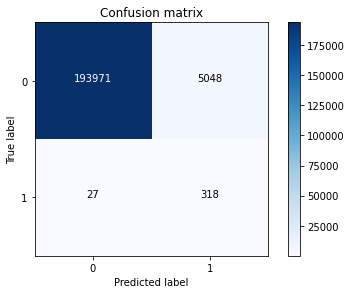

In [88]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 91.83673469387755%


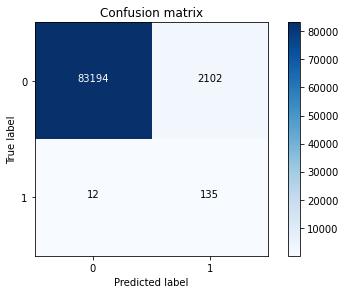

In [89]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [90]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


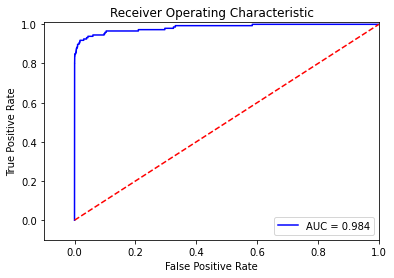

In [91]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
roc_auc

0.9840823217300426